In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('starts.csv')
df['event_date'] = pd.to_datetime(df['event_date'])
pd.set_option('display.max_columns', None)  

In [8]:
df = df[(df['athlete_age'] < 80) & (df['athlete_age'] > 15) & (df['finish_time'] < 3600)]

In [12]:
df.head(1)


,record_id,athlete_id,event_name,event_date,city,region,finish_time,athlete_gender,athlete_age,is_newbie,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,weather.main,weather.description,rain.1h,snow.1h,track_description_surface
0,6490,790055465,Нижний пруд,2023-03-25,Калининград,Калининградская область,1260,1,43,1,7.9,5.59,1001,90,6.36,25,3.67,223,Rain,light rain,0.1,NaN,"асфальт, бетон"


In [11]:
df['athlete_gender'] = df['athlete_gender'].apply(lambda x: 1 if x == 'мужской' else 0)

In [19]:
df.groupby('record_id')[['event_name', 'event_date', 'city', 'region', 'temp',
       'feels_like', 'pressure', 'humidity', 'dew_point', 'clouds',
       'wind_speed', 'wind_deg', 'weather.main', 'weather.description',
       'rain.1h', 'snow.1h', 'track_description_surface']].nunique().le(2).all().all()

np.True_

Проверка на то, в каждой ли пробежке одинакого записаны данные по погоде

In [13]:
to_do = {'finish_time': 'mean', 'athlete_gender': 'mean', 'athlete_age': 'mean', 'is_newbie': 'mean'}
for colum in ['event_name', 'event_date', 'city', 'region', 'temp',
       'feels_like', 'pressure', 'humidity', 'dew_point', 'clouds',
       'wind_speed', 'wind_deg', 'weather.main', 'weather.description',
       'rain.1h', 'snow.1h', 'track_description_surface']:
    to_do[colum] = 'first'



Здесь я просто создаю таблицу с забегами, все значения погоды одинаковые, поэтому я беру первое. Остальное я беру среднее время бега, средний возраст, долю мужчин в забеге и долю новичков.

In [14]:
runs = df.groupby('record_id').agg(to_do).reset_index()
runs.head(5)

,record_id,finish_time,athlete_gender,athlete_age,is_newbie,event_name,event_date,city,region,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,weather.main,weather.description,rain.1h,snow.1h,track_description_surface
0,4751,1723.222222,0.888889,51.777778,0.000000,Якутск Дохсун,2023-01-01,Якутск,Республика Саха (Якутия),-42.43,-42.43,1021,65,-46.10,100,1.00,10,Fog,fog,NaN,NaN,твердое
1,4752,1763.500000,0.722222,42.777778,0.055556,Новосибирск набережная,2023-01-01,Новосибирск,Новосибирская область,-7.15,-12.41,1029,91,-8.23,100,3.30,161,Snow,light snow,NaN,0.19,асфальт
2,4753,1741.181818,0.681818,43.545455,0.045455,Челябинск Экопарк,2023-01-01,Челябинск,Челябинская область,-28.01,-28.01,1028,75,-30.79,75,1.00,120,Snow,light snow,NaN,NaN,смешанное
3,4755,2030.444444,0.555556,50.888889,0.111111,Курган Центральный парк,2023-01-01,Курган,Курганская область,-30.18,-30.18,1034,75,-32.91,79,1.29,30,Clouds,broken clouds,NaN,NaN,твердое
4,4758,1657.821429,0.821429,40.785714,0.035714,Пестовский,2023-01-01,Балашиха,Московская область,1.24,-3.48,1009,98,0.96,100,5.22,211,Snow,light snow,NaN,0.22,твердое


In [15]:
runs['discomfort_index'] = runs['temp'] - (0.55 - 0.0055 * runs['humidity']) * (runs['temp'] - 14.5)

Классификация индекса дискомфорта:
Очень холодно - < 5
Холодно - (5 - 10)
Комфортно - (10 - 15)
Жарко - (15 - 25)
Очень жарко - > 25

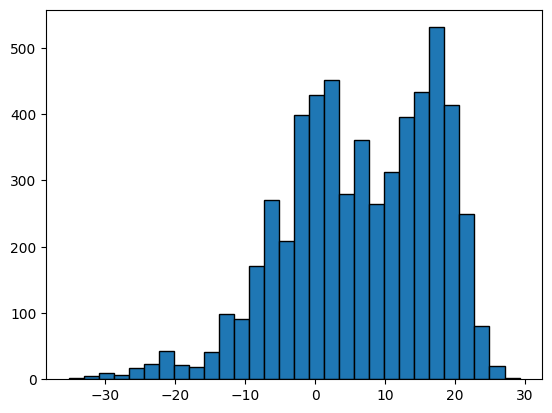

In [16]:
plt.hist(runs['discomfort_index'], bins=30, edgecolor='black')
plt.show()